In [43]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gamma

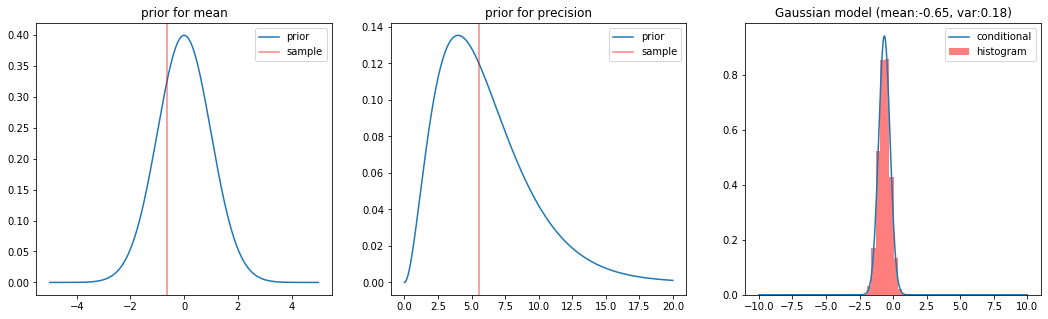

In [83]:
# params
# mean prior (normal)
m_0 = 0
sigma2_0 = 1
n_samples = 10000
#variance prior (inverse Gamma)
a_0 = 3
b_0 = 0.5
# sample parameters
m = norm.rvs(m_0,np.sqrt(sigma2_0))
prec = gamma.rvs(a=a_0,scale=1/b_0)
samples = norm.rvs(m,np.sqrt(1/prec),n_samples)

plt.figure(figsize=(18,5))

plt.subplot(131)
mean_axis = np.arange(-5, 5, 0.001)
plt.plot(mean_axis, norm.pdf(mean_axis,m_0,np.sqrt(sigma2_0)),label='prior')
plt.axvline(m,c='r', alpha=0.5,label='sample')
plt.title('prior for mean')
plt.legend()

plt.subplot(132)
prec_axis = np.arange(0, 20, 0.001)
plt.plot(prec_axis, gamma.pdf(prec_axis,a=a_0,scale=1/b_0),label='prior')
plt.axvline(prec,c='r', alpha=0.5,label='sample')
plt.legend()
plt.title('prior for precision')

plt.subplot(133)
mean_axis = np.arange(-10, 10, 0.001)

plt.plot(mean_axis, norm.pdf(mean_axis,m,np.sqrt(1/prec)),label='conditional')
plt.hist(samples, density=True, color='r', alpha=0.5,label='histogram')
plt.title(f'Gaussian model (mean:{m:.2f}, var:{1/prec:.2f})')
plt.legend()



In [84]:
#updated hypers:
#mean
prec_0 = 1/sigma2_0
m_post_mean = (prec_0*m_0 + prec*np.sum(samples))/(prec_0 + n_samples*prec)
m_post_var = 1/(prec_0 + n_samples*prec)

#prec
prec_post_a = a_0 + n_samples/2
prec_post_b = b_0 + np.sum((samples-m)**2)/2


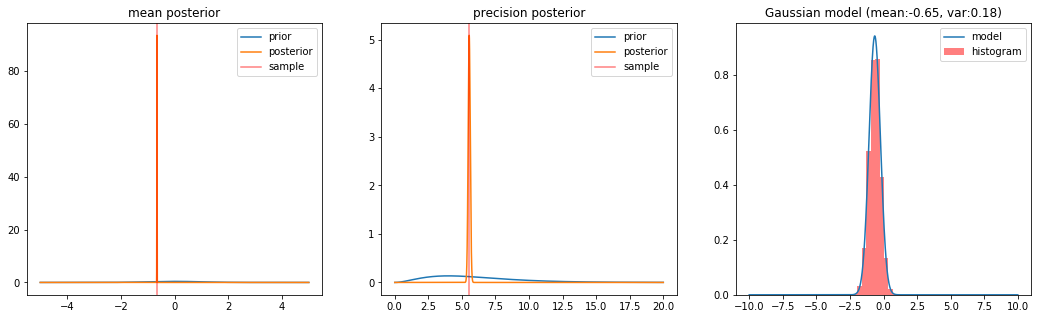

In [85]:
plt.figure(figsize=(18,5))

plt.subplot(131)
mean_axis = np.arange(-5, 5, 0.001)
plt.plot(mean_axis, norm.pdf(mean_axis,m_0,np.sqrt(sigma2_0)),label='prior')
plt.plot(mean_axis, norm.pdf(mean_axis,m_post_mean,np.sqrt(m_post_var)),label='posterior')
plt.axvline(m,c='r', alpha=0.5,label='sample')
plt.title('mean posterior')
plt.legend()

plt.subplot(132)
prec_axis = np.arange(0, 20, 0.001)
plt.plot(prec_axis, gamma.pdf(prec_axis,a=a_0,scale=1/b_0),label='prior')
plt.plot(prec_axis, gamma.pdf(prec_axis,a=prec_post_a,scale=1/prec_post_b),label='posterior')
plt.axvline(prec,c='r', alpha=0.5,label='sample')
plt.legend()

plt.title('precision posterior')

plt.subplot(133)
mean_axis = np.arange(-10, 10, 0.001)

plt.plot(mean_axis, norm.pdf(mean_axis,m,np.sqrt(1/prec)),label='model')
plt.hist(samples, density=True, color='r', alpha=0.5,label='histogram')
plt.title(f'Gaussian model (mean:{m:.2f}, var:{1/prec:.2f})')
plt.legend()